In [62]:
%run "Retropy_framework.ipynb"

In [58]:
aggg = get("AGGG.L@AV", interpolate=False)
agggB = get("AGGG;LN@B", interpolate=False)
#agggJT = convertSeries(get("IE00B3F81409@JT", interpolate=False), "EUR", "USD")
idx = name(get("LEGATRUU;IND@B", interpolate=False), "~AGGG")
glagB = get("GLAG;LN@B", interpolate=False)
all = [aggg, agggB, glagB, idx]
show(all, trim=False, legend=False)

trimmed data from 1973-01-02 [FRED/DTWEXM@Q = usdMajor] to 2013-08-23 [~AGGG]
trimmed data from 1995-01-03 [VUSTX = lgb, VFITX = gb, +4 more] to 2016-01-04 [HYXU]


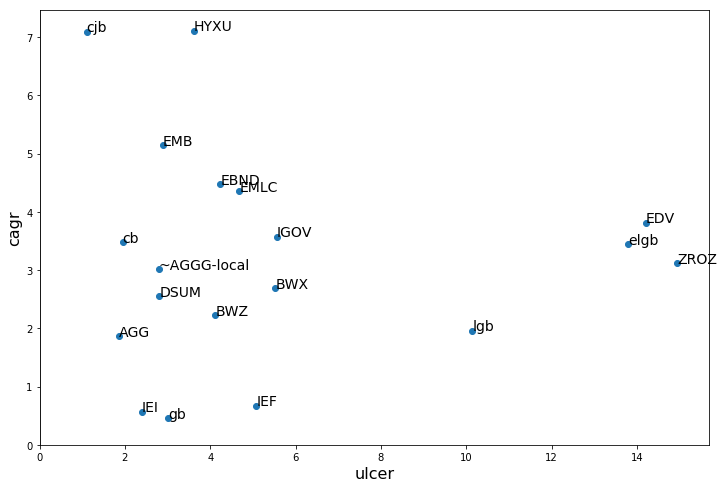

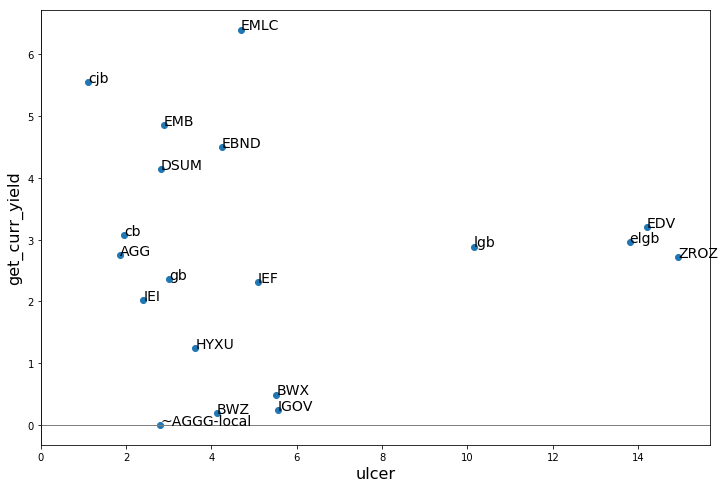

In [59]:
# AGGG seems to be very closely related to corp-bonds (in local currency)
# also interesting to note that in this period, credit risk was well rewarded, while duration risk was too but with a price
idxLocalCurs = name(get({idx:100, usdMajor:61.4}), "~AGGG-local")
all = get([idxLocalCurs, IEI, IEF, lgb, elgb, EDV, ZROZ, gb, AGG, cb, cjb, IGOV, BWX, BWZ, EBND, EMB, DSUM, EMLC, HYXU])
showRiskReturn(*all)
showRiskReturn(*all, ret_func=get_curr_yield)

In [60]:
show(lmap(dd, [IEI, IEF, AGG, cb, idxLocalCurs]), trim=False, legend=False)

In [39]:
# AGGG and GLAG are the same, both dist' with the unhdged version
show(agggB, glagB)
show(agggB / glagB, 0, 1)

trimmed data from 2017-11-24 [AGGG;LN@B] to 2018-02-02 [GLAG;LN@B]


trimmed data from 2018-02-02 [AGGG;LN@B / GLAG;LN@B] to 2018-02-02 [AGGG;LN@B / GLAG;LN@B]


In [47]:
# the regression gives AGG a 45% holding, matching EXACTLY the USD exposure of at the ETF
lrret(idx, [AGG, IGOV], fit_values=True)

trimmed data from 2013-08-23 [LEGATRUU;IND@B, LEGATRUU;IND@B - fit] to 2013-08-23 [LEGATRUU;IND@B, LEGATRUU;IND@B - fit]


R^2: 0.9854086402657439


IGOV   0.5428
AGG    0.4572
dtype: float64

In [63]:
agg = getYield("AGG")
igov = getYield("IGOV")
bwx = getYield("BWX")
aggg = name((agg.s*0.45 + igov.s*0.55).dropna(), "~AGGG")
show(agg, igov, bwx, aggg, range(6), ta=False, log=False)

In [7]:
lrret(idx, [usdMajor], pos_weights=False, sum1=False, fit_values=False)

trimmed data from 2013-08-23 [LEGATRUU;IND@B, LEGATRUU;IND@B - fit] to 2013-08-23 [LEGATRUU;IND@B, LEGATRUU;IND@B - fit]


R^2: 0.6757894251539965


usdMajor   -0.6141
dtype: float64

In [10]:
#  33.34% EDV - אג"ח ממשלת ארה"ב ארוך מאד (24.5 מח"מ)
# - 33.33% BWZ - אג"ח ממשלתי בינלאומי קצר (לא כולל ארה"ב) נקוב במטבע מקומי (1.8 מח"מ)
# - 22.00% EBND - אג"ח ממשלתי מדינות מתפתחות נקוב במטבע מקומי (5.3 מח"מ)
# - 11.33% DSUM - אג"ח קונצרני קצר offshore נקוב ביואן (1.6 מח"מ).

p = get({AGG:33.33, BWZ: 33.33, EBND: 22, DSUM:11.34})
show(p, idx)

trimmed data from 2003-09-26 [AGG] to 2011-09-23 [DSUM]
trimmed data from 2011-09-24 [AGG:33.3|BWZ:33.3|EBND:22|DSUM:11.3] to 2013-08-23 [LEGATRUU;IND@B]


In [13]:
lrret(idx, [EDV, BWZ, BWX, EBND, DSUM])

trimmed data from 2013-08-23 [LEGATRUU;IND@B, LEGATRUU;IND@B - fit] to 2013-08-23 [LEGATRUU;IND@B, LEGATRUU;IND@B - fit]


R^2: 0.8922560159788904


BWX    0.5412
EDV    0.1217
DSUM   0.0880
EBND   0.0320
BWZ    0.0000
dtype: float64


Cross:
trimmed data from 2003-09-26 [AGG] to 2013-08-23 [~AGGG]
~AGGG: IGOV:52.9|AGG:45.9|EBND:1.2   R^2: 0.986
EDV: AGG:100.0   R^2: 0.185
AGG: ~AGGG:25.0|EDV:22.9   R^2: 0.570
BWZ: IGOV:60.3|EBND:35.1   R^2: 0.613
IGOV: BWZ:48.1|~AGGG:33.3|EBND:10.1|EDV:8.4   R^2: 0.926
EBND: IGOV:70.8|BWZ:29.2   R^2: 0.738

Incremental:
trimmed data from 1990-01-02 [VFINX = lc] to 2013-08-23 [~AGGG]
AGG: lc:19.6   R^2: 0.167
EDV: AGG:100.0   R^2: 0.200
BWZ:    R^2: 0.250
EBND: BWZ:85.9|EDV:14.1   R^2: 0.720
~AGGG: AGG:41.8|BWZ:38.1|EDV:11.6|EBND:8.4   R^2: 0.896
IGOV: BWZ:48.1|~AGGG:33.3|EBND:10.1|EDV:8.4   R^2: 0.926


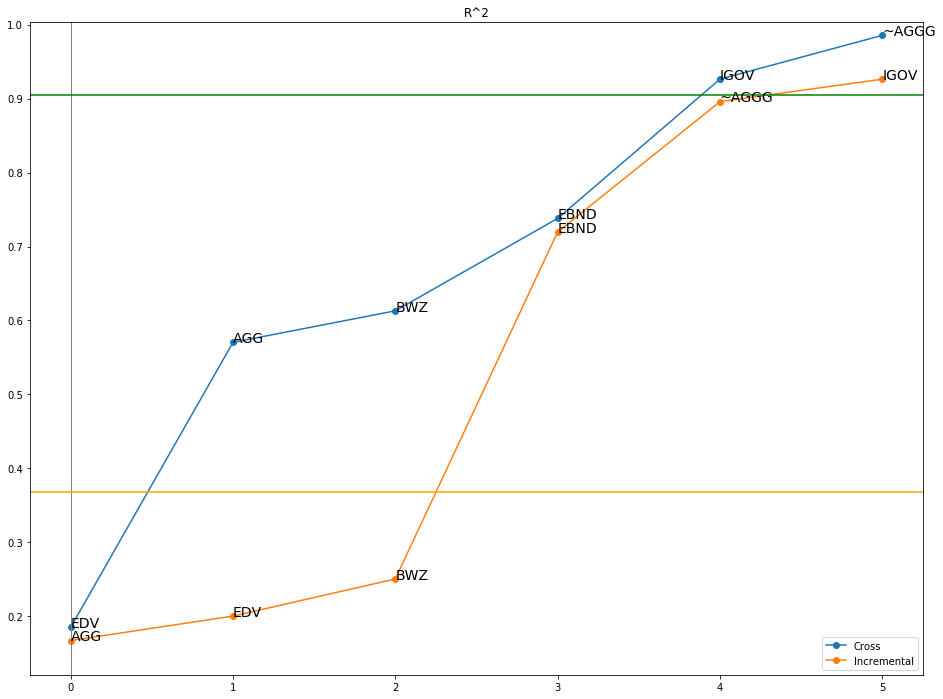

In [19]:
lrret_mutual([idx, EDV, AGG, BWZ, IGOV, EBND,])

In [ ]:
# be sure to save before you publish
# when done, you will get a public link to an HTML file with the results
publish()